# 5 Step Workflow To Touch Into the Heart of Matplotlib And Create Awesome Graphs
## Use Matplotlib like an absolute boss!
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@ilargian-faus-763704?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Ilargian Faus</a>
        on 
        <a href='https://www.pexels.com/photo/close-up-photo-of-dog-wearing-sunglasses-1629781/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels.</a> All images are by the author unless specified otherwise.
    </strong>
</figcaption>

# I used to have a rule...

When I was a beginner learning data viz, I used to have a rule - never, ever visit the Matplotlib documentation. 

Nothing good ever came out of there. When I was on its pages, my eyes would process *English words* but, somehow, they were interpreted into my brain like I was deciphering a foreign language. Then I would stumble upon some masterpieces like [these](https://ibexorigin.medium.com/yes-these-unbelievable-masterpieces-are-created-with-matplotlib-2256a4c54b12?source=your_stories_page-------------------------------------) and I would think, do I use the same library?

Even if you are a season programmer, I am sure you've faced similar challenges while learning Maplotlib. It is no easy library. There are so many classes and so damn many ways of doing the simplest tasks. Utter confusion. 

If you are in that position or want to step up your Matplotlib game, I've got the guide you need. I will show you to reach *deep* into the roots of Matplotlib jungle, set a fire on it and fly out on a *jetpack*. Are you ready? Let's start!

# Setup

In [3]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.datasets import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

In [2]:
X, y = make_classification()

# Matplotlib was created by artists

Though it *is* true that Matplotlib was written by exceptional programmers, it is made up of base classes called Artists.

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)
<figcaption style="text-align: center;">
    <strong>
        Matplotlib anatomy from the docs.
    </strong>
</figcaption>

Every circle-annotated component of the plot is implemented as a separate class that *inherits* from the base artist. But this ability of representing everything as a class has its pros and cons. 

On the one hand, it gives Matplotlib unprecedented flexibility. Using their respective class, you can tweak virtually any plot component until you are satisfied. Often, you have multiple options to do the same task, enabling you to switch between different interfaces.

Perhaps, this is what upsets Pythonistas about MPL the most. According to the [zen of Python](https://www.python.org/dev/peps/pep-0020/), there should be one, and preferably only one obvious way to do something. And Matplotlib API is a violation of this rule in every way imaginable.

As a result, beginners are confused. They don't know which class or function to use to do a simple task. They don't understand the documentation because, frankly, it is so damn hard to understand. Even experienced developers may not have a clue what errors like this mean:

```python
>>> plt.plot([1, 2, 3], [2, 6, 4], s=4)

...
AttributeError: 'Line2D' object has no property 's'
```

Naturally, you are frustrated because you don't know where the heck you used Lined2D object or where it came from.

If you are one of these people, I will show you a few tricks that I have learned which will make you a pro Matplotlib user and read the documentation like you would read children's bedtime story.

# Creating a unified workflow of your own

We will start by choosing a unified approach to doing tasks. As I said, there are many ways to do a single one, so it is important to stick to only one style and master it. 

The workflow I use to create a plot and customize it is as follows:
1. Create the plot itself with basic elements and low customization.
2. Find out weaknesses of the plot and make note of the components you want to improve.
3. Isolate those weak components with relevant Matplotlib functions.
4. Tweak them until you are satisfied, using the swiss army knife of Matplotlib (more on that later).
5. Save or display the plot.

We will learn how to do each step in detail. I guarantee you that this framework works for almost any type of plot you create and customization you want to make. 

# Figuratively speaking...

Let's start by learning how to create plots using figures. A Figure object in MPL is the highest-level artist, which can be thought as the canvas you draw everything on.

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

A figure with noting drawn on it can be created with the `figure` function. On its own, figure does nothing - just remember that it is the blank white page you draw your plots on.

We will come back to figures later.

# Let's throw Axes!

![](images/pexels2.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@matreding?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Mathias P.R. Reding</a>
        on 
        <a href='https://www.pexels.com/photo/old-axe-with-rusty-blade-in-stump-6835322/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a></strong>
</figcaption>

The fun begins when we add axes to the figure. The `Axes` class is an artist that represents a set of x, y coordinate system in a plot:

In [10]:
fig = plt.figure()

ax1 = fig.add_axes()
ax1

<Figure size 432x288 with 0 Axes>

The function to add a blank axes to a figure is `add_axes` but in practice, you never use it. Instead, you usually create a single figure and one or more axes simultaneously using the `subplots` function:

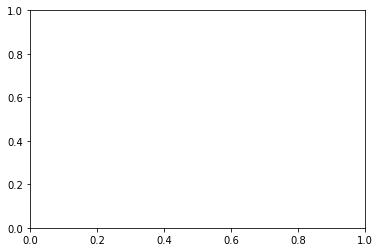

In [11]:
fig, ax = plt.subplots()

This immediately creates a figure and attaches an axes (coordinate system). Next, we start plotting data on the axes using the plotting methods. 

These plots have names such as `bar`, `hist`, `scatter`, `boxplot`, etc. Let's create a simple scatterplot and draw a couple of lines:

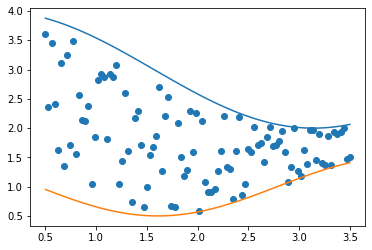

In [24]:
fig, ax = plt.subplots()

# Create the data to plot
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);

We can already see that the plot needs a few text labels. Besides, we don't like the default colors of the points and the lines. Also, figure itself is a bit small.

See what we did here? We first created a base plot and identified the components we want to improve. Now, we need to figure out how to extract those components and customize them.

# Breaking down the plot components and their components and their components

Since we created the axes and figures at the beginning, they are already isolated as objects (`fig` and `ax`). 

Now, let's assume for a moment that we have the figure but not the axes. How do we extract it from the figure? 

Every matplotlib artist has several methods that start with `get_*` prefix. If we call the `dir` function on `fig`, we can see a few examples:

```python
>>> dir(fig)
[
 ...
 'gca',
 'get_agg_filter',
 'get_alpha',
 'get_animated',
 'get_axes',
 'get_dpi',
 'get_edgecolor',
 'get_facecolor',
 'get_figheight',
 'get_figure',
 'get_figwidth',
 'get_frameon',
 'get_gid',
 'get_in_layout'
 ...
]
```

In the list we see a little function called `get_axes`, so we'll use it.

In [31]:
axes_list = fig.get_axes()
axes_list

[<AxesSubplot:>]

The official class name of axes is `AxesSubplot` and as we see, there is only one in the list:

In [35]:
ax = axes_list[0]

I know these are very basic concepts but the lesson you should take from here is that every class in MPL has such `get_*` functions which allow you to retrieve different parts of that component class.

# The swiss army knives of Matplotlib

![](images/pixabay.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://pixabay.com/users/bujinzhao-10495661/'>bujinzhao</a>
        on 
        <a href=''>Pixabay</a>
    </strong>
</figcaption>

Now that we have a couple objects, it is time we customize them using their parameters. But first, we have to ask - what parameters are there for my object and what values do they take?

That's where the swiss army knife of Matplotlib comes into play. It is the function `plt.setp` ( *set parameter*) and it is accessible through the PyPlot API. 

So, let's see what parameters the figure object accepts:

In [36]:
plt.setp(fig)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  canvas: FigureCanvas
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  constrained_layout: bool or dict or None
  constrained_layout_pads: unknown
  contains: unknown
  dpi: float
  edgecolor: color
  facecolor: color
  figheight: float
  figure: `.Figure`
  figwidth: float
  frameon: bool
  gid: str
  in_layout: bool
  label: object
  linewidth: number
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  rasterized: bool
  size_inches: (float, float) or float
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  tight_layout: bool or dict with keys "pad", "w_pad", "h_pad", "rect" or None
  transform: `.Transform`
  url: str
  visible: bool
  zorder: float


Calling the function on an object with no parameters prints the documentation of all object arguments. In the list of parameters, we see the one we want to change which is the figure size. It is the one named `size_inches`:

In [38]:
plt.setp(fig, "size_inches")

  size_inches: (float, float) or float


Passing the object and its parameter name as a string is a shorthand for printing out the parameters possible values. Now, let's finally change the figure size:

In [42]:
plt.setp(fig, size_inches=(9, 6))

[None]

The function returns None, meaning the operation was successful. Now, we take a look at the plot once again:

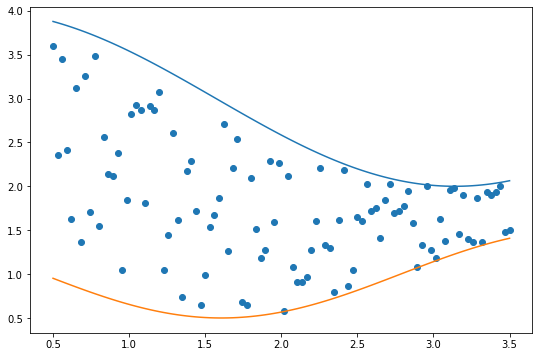

In [43]:
fig.get_figure()

Now, it is time for axes:

In [46]:
plt.setp(ax)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomne

We want to change the axis labels, limits, the title and the axis spine color. If we didn't know the current values of these parameters we just call `plt.getp` - a friend of `setp`:

In [50]:
plt.getp(ax, "xlim")

(0.35, 3.65)

Similar to `setp`, `getp` returns the defaults or current values. Calling it without any arguments on an object, returns all default values. Let's change the ones we wanted:

In [55]:
plt.setp(
    ax,
    xlabel="Simple x range",
    ylabel="Simply y range",
    title="Meaningless jumble of couple of cosines",
    xlim=(0, 4),
    ylim=(0, 4.5),
)

[Text(0.5, 17.200000000000003, 'Simple x range'),
 Text(17.200000000000003, 0.5, 'Simply y range'),
 Text(0.5, 1.0, 'Meaningless jumble of couple of cosines'),
 0.0,
 4.0,
 0.0,
 4.5]

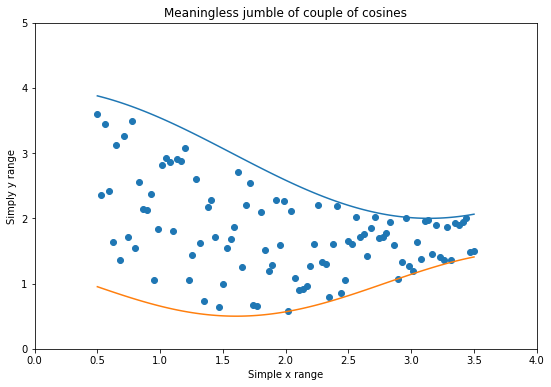

In [54]:
fig.get_figure()

But how about the line and marker colors? We also said we would be tweaking the axis lines? Well, they are separate classes and we need to extract them from the axes. But before we do that, there is a couple of powerful concepts we need to learn about. This section only served as an introduction to `setp` and `getp` functions.

# Containers and primitives

Getting from the base artists to colorful plots, the components need to go through a long chain of inheritance of many MPL classes. Along this chain, there are two groups of classes which are crucial to how you use Matplotlib. These groups are called **containers** and **primitives**. 

We have already seen two instances of **containers** - figure and axes. Figure contains axes and axes contains pretty much everything. 

**Primitives** are all the graphical or geometrical objects that go into a container. You almost never use these primitives directly. They are created dynamically when you create plots. All of their names can be accessed under the `patches` module of Matplotlib:

In [60]:
import matplotlib.patches as patches

dir(patches)

['Arc',
 'Arrow',
 'ArrowStyle',
 'BoxStyle',
 'CapStyle',
 'Circle',
 'CirclePolygon',
 'ConnectionPatch',
 'ConnectionStyle',
 'Ellipse',
 'FancyArrow',
 'FancyArrowPatch',
 'FancyBboxPatch',
 'JoinStyle',
 'NonIntersectingPathException',
 'Number',
 'Patch',
 'Path',
 'PathPatch',
 'Polygon',
 'Rectangle',
 'RegularPolygon',
 'Shadow',
 'StepPatch',
 'Wedge',
 '_Style',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_patch_kwdoc',
 '_point_along_a_line',
 '_register_style',
 '_simpleprint_styles',
 'artist',
 'bbox_artist',
 'cbook',
 'colors',
 'contextlib',
 'docstring',
 'draw_bbox',
 'functools',
 'get_cos_sin',
 'get_intersection',
 'get_parallels',
 'inside_circle',
 'inspect',
 'k',
 'make_wedged_bezier2',
 'math',
 'mhatch',
 'mlines',
 'mpl',
 'namedtuple',
 'np',
 'split_bezier_intersecting_with_closedpath',
 'split_path_inout',
 'textwrap',
 'transforms']

As you can see, we have got everything we need to create histograms, scatterplots, boxplots and lineplots. They all can be created using patches like circles, rectangles, polygons and lines. 

![](images/1.png)
<figcaption style="text-align: center;">
    <strong>
        Full image can be found 
        <a href='https://matplotlib.org/stable/_images/inheritance-50f63fede88c32059ff6460c4a9c89a5f3850a4a.png'>here from the docs.</a>
    </strong>
</figcaption>

From the above map of Matplotlib classes, we see the little Lind2D I mentioned earlier. It is a class that draws the lines and markers when we plot scatterplots and lines using `plot` or `scatter` functions. 

Now, getting back to our plot - here are the steps we have made so far:

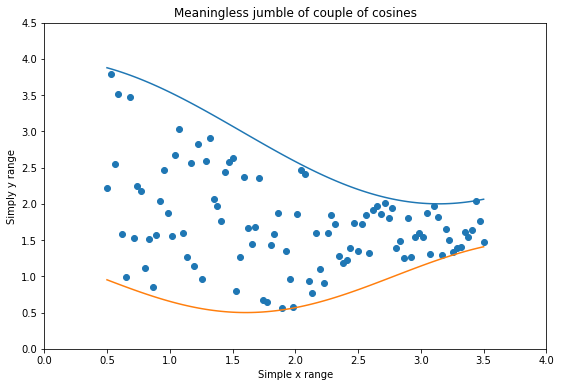

In [70]:
fig, ax = plt.subplots()

plt.setp(fig, size_inches=(9, 6))

# Create the data to plot
...

ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2)

plt.setp(
    ax,
    xlabel="Simple x range",
    ylabel="Simply y range",
    title="Meaningless jumble of couple of cosines",
    xlim=(0, 4),
    ylim=(0, 4.5),
);

Now, we know that the lines and dots are actually patch artists contained within the axes. Let's actually look at all artists within `ax`:

In [87]:
ax.get_children()

 Text(0.5, 1.0, 'Meaningless jumble of couple of cosines'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

We see our lines. We also see 4 spines, which are also separate classes. The X and Y axis objects are also visible along with the first element, which we haven't seen before. 

`PathCollection` represents the groups of dots. So, let's extract it and give the dots a few customizations:

In [94]:
# Look at what params we want
# plt.setp(ax.get_children()[0])

plt.setp(ax.get_children()[0], edgecolor="red", facecolor="red", sizes=[40])

[None, None, None]

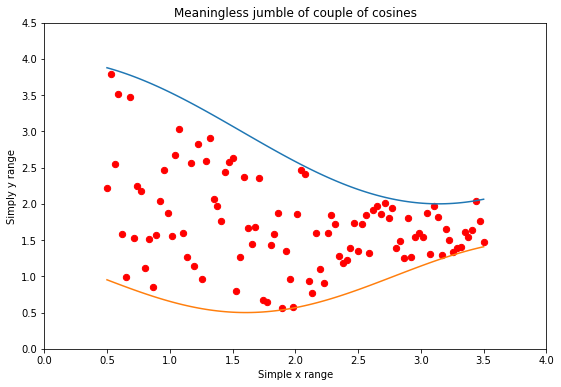

In [93]:
fig.get_figure()

We can also tweak the spines:

In [115]:
for spine in ax.get_children()[3:7]:
    plt.setp(spine, edgecolor="cyan", lw=3)

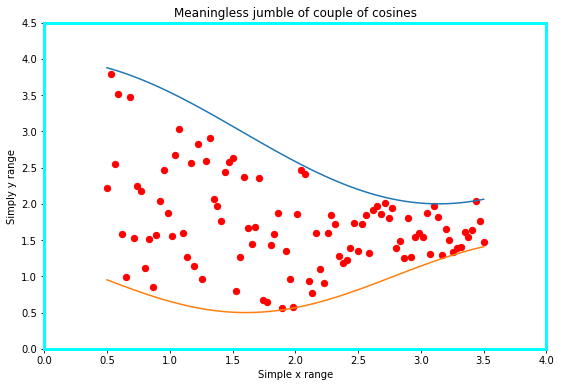

In [116]:
fig.get_figure()

A final trick I recommend is storing all created plots into a variable so that you can work on them separately without having to access them though axes:

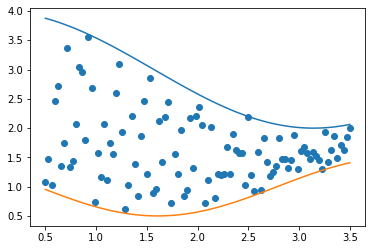

In [117]:
fig, ax = plt.subplots()

# Create the data to plot
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# Extract into separate variables
dots = ax.scatter(X, Y3)
line1 = ax.plot(X, Y1)
line2 = ax.plot(X, Y2);

In [123]:
type(dots), type(line1[0])

(matplotlib.collections.PathCollection, matplotlib.lines.Line2D)

# Putting everything together

Let's structure all the jumbled pieces of information we learned today:

1. Create the plot and mark the pieces you want to improve.
2. Extract a single component. Call `dir` on the axes or figure object, if you don't know what you are looking for. Also, the `get_*` prefixed functions are helpful in this case.
3. After you have a component, see the default values of its parameters by calling `plt.getp`.
4. Mark the parameters you need and call `plt.setp` on each of them to see the possible values they accept.
5. Set your custom values using the same function. 
6. Iterate through 2-5 until you have the perfect plot you need.

Once you go through this workflow a few times, you will start getting more comfortable with higher-level functions. Instead of extracting every component from the axes and primitives, you will start passing arguments directly to the function calls or when creating the axes. 

But `setp`, `getp` and `dir` functions are everything you need if you ever encounter an unknown Matplotlib class. 

Besides, learning the concepts of artists, patches and container/primitives has set you up to read the documentation with understanding. These are the terms that come up the most in the docs. 

# Summary

Data visualization isn't about learning a plotting library. It is the combination of creativity, understanding the audience and delivering insights in a way that is professional and informative. 

I expect all these 3 skills from your end. My part was only to show how you can use one of the strongest plotting libraries in the Python ecosystem to complement those skills. I have taught you a powerful iterative process that enables you to improve Matplotlib plots in a smart and structured manner. 

TODO add medium cta

https://ibexorigin.medium.com/membership

# You might be interested in these hits...
https://towardsdatascience.com/10-underrated-sklearn-features-you-can-use-for-your-advantage-right-now-3a87b10a8d7f

https://towardsdatascience.com/matplotlib-vs-plotly-lets-decide-once-and-for-all-ad25a5e43322

https://towardsdatascience.com/7-cool-python-packages-kagglers-are-using-without-telling-you-e83298781cf4

https://towardsdatascience.com/tricky-way-of-using-dimensionality-reduction-for-outlier-detection-in-python-4ee7665cdf99

https://towardsdatascience.com/how-to-explain-black-box-models-with-shap-the-ultimate-guide-539c152d3275